## Context

- Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
- They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.


## Problem Statement : 

- Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.


### Column Profiling:

    Serial No. (Unique row ID)
    GRE Scores (out of 340)
    TOEFL Scores (out of 120)
    University Rating (out of 5)
    Statement of Purpose and Letter of Recommendation Strength (out of 5)
    Undergraduate GPA (out of 10)
    Research Experience (either 0 or 1)
    Chance of Admit (ranging from 0 to 1)
    

- Exploratory Data Analysis
- Linear Regression



- Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.
- Drop the unique row Identifier if you see any. This step is important as you don’t want your model to build some understanding based on row numbers.

- Use Non-graphical and graphical analysis for getting inferences about variables.
- This can be done by checking the distribution of variables of graduate applicants.
- Once you’ve ensured that students with varied merit apply for the university, you can start understanding the relationship between different factors responsible for graduate admissions.
- Check correlation among independent variables and how they interact with each other.

- Use Linear Regression from (Statsmodel library) and explain the results.

    - Test the assumptions of linear regression:
            Multicollinearity check by VIF score
            Mean of residuals
            Linearity of variables (no pattern in residual plot)
            Test for Homoscedasticity
            Normality of residuals
            
- Do model evaluation- MAE, RMSE, R2 score, Adjusted R2.
- Provide actionable Insights & Recommendations
- Try out different Linear Regressions



- Define Problem Statement and perform Exploratory Data Analysis (10 points)
    - Definition of problem (as per given problem statement with additional views)
    - Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.
    - Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
    - Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
    - Illustrate the insights based on EDA
    - Comments on range of attributes, outliers of various attributes
    - Comments on the distribution of the variables and relationship between them
    - Comments for each univariate and bivariate plots

- Data Preprocessing (10 Points)
    - Duplicate value check
    - Missing value treatment
    - Outlier treatment
    - Feature engineering
    - Data preparation for modeling
    
- Model building (10 Points)

    - Build the Linear Regression model and comment on the model statistics
    - Display model coefficients with column names
    - Try out Ridge and Lasso regression
    
    
- Testing the assumptions of the linear regression model (50 Points)


- Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5) (10 Points)
- The mean of residuals is nearly zero (10 Points)
- Linearity of variables (no pattern in the residual plot) (10 Points)
- Test for Homoscedasticity (10 Points)
- Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) (10 Points)
- Model performance evaluation (10 Points)
- Metrics checked - MAE, RMSE, R2, Adj R2
- Train and test performances are checked
- Comments on the performance measures and if there is any need to improve the model or not

- Actionable Insights & Recommendations (10 Points)
    - Comments on significance of predictor variables
    - Comments on additional data sources for model improvement, model implementation in real world, potential business benefits from improving the model (These are key to differentiating a good and an excellent solution)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm




In [2]:
df = pd.read_csv("Jamboree_Admission.csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
data = df.copy()

In [5]:
# shape of the data
data.shape


(500, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
data.drop(["Serial No."],axis = 1, inplace = True)

In [8]:
data.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
151,332,116,5,5.0,5.0,9.28,1,0.94
234,330,113,5,5.0,4.0,9.31,1,0.91
370,310,103,2,2.5,2.5,8.24,0,0.72
396,325,107,3,3.0,3.5,9.11,1,0.84
211,328,110,4,5.0,4.0,9.14,1,0.82


In [9]:
# isnull ? 

data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
# no null values found in data 

In [11]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
data.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [ ]:
## University Rating,SOP,LOR,Research are categorical variables.

In [13]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [14]:
# further correlation check is being done while Multicoliniearity check for independent features and 
# correlation between independent and dependent features.

<AxesSubplot:>

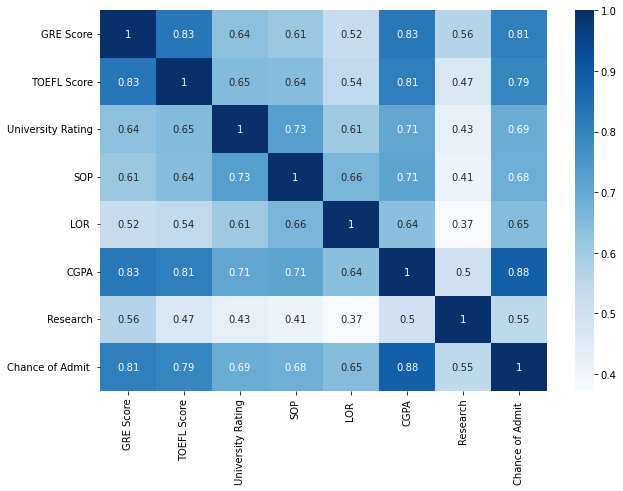

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot = True,cmap = "Blues")

In [16]:
data.columns  = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit']

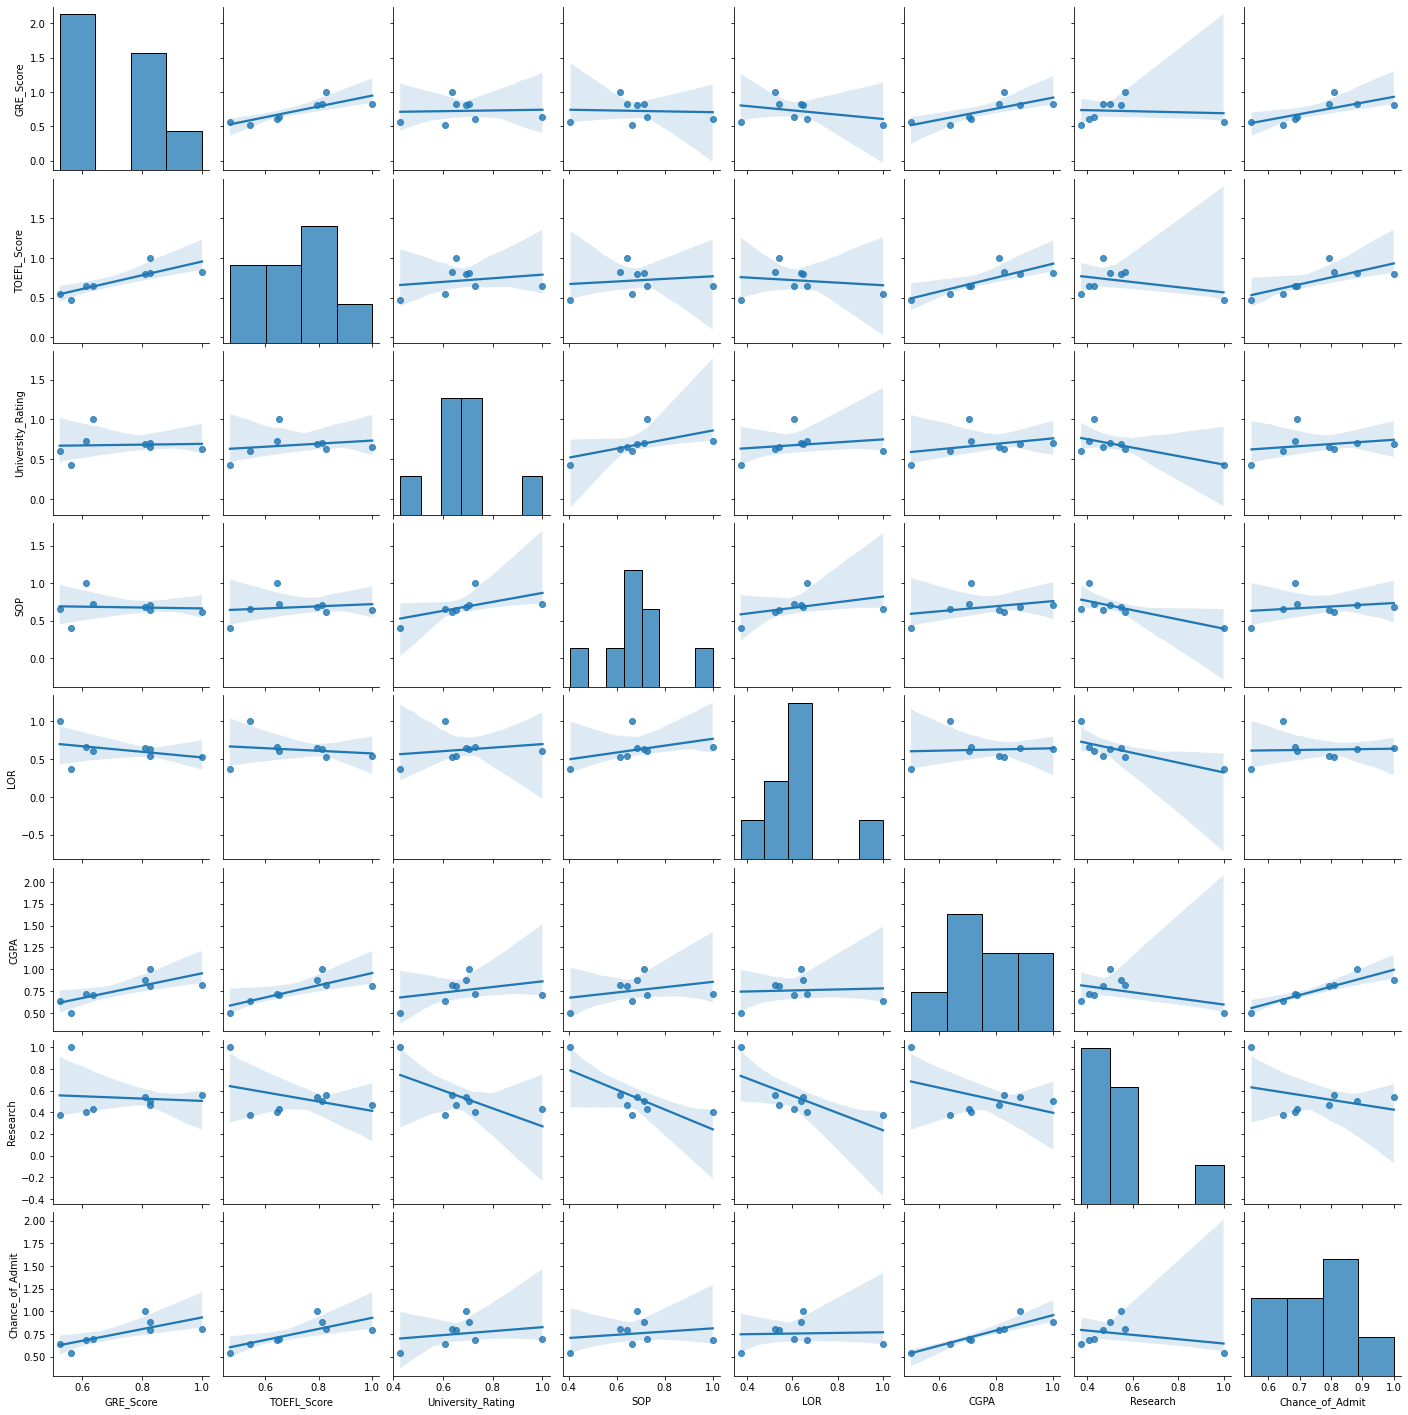

In [18]:
sns.pairplot(data.corr(),kind= 'reg',)

## check for outliers using IQR method

In [19]:
def detect_outliers(data):
    length_before = len(data)
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3-Q1
    upperbound = Q3+1.5*IQR
    lowerbound = Q1-1.5*IQR
    if lowerbound < 0:
        lowerbound = 0
    
    length_after = len(data[(data>lowerbound)&(data<upperbound)])
    return f"{np.round((length_before-length_after)/length_before,4)} % Outliers data from input data found"

In [20]:
for col in data.columns:
    print(col," : ",detect_outliers(data[col]))

GRE_Score  :  0.0 % Outliers data from input data found
TOEFL_Score  :  0.0 % Outliers data from input data found
University_Rating  :  0.0 % Outliers data from input data found
SOP  :  0.0 % Outliers data from input data found
LOR  :  0.024 % Outliers data from input data found
CGPA  :  0.0 % Outliers data from input data found
Research  :  0.44 % Outliers data from input data found
Chance_of_Admit  :  0.004 % Outliers data from input data found


In [21]:
# there are no significant amount of outliers found in the data 


### Checking the distributions for Continuous Variables : 


In [22]:
# Chance_of_Admit

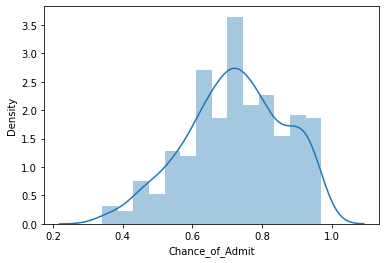

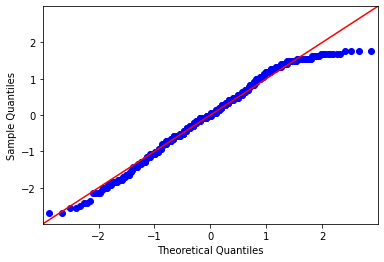

In [23]:

sns.distplot(data["Chance_of_Admit"])
sm.qqplot(data["Chance_of_Admit"],fit=True, line="45")
plt.show()

#### GRE_Score

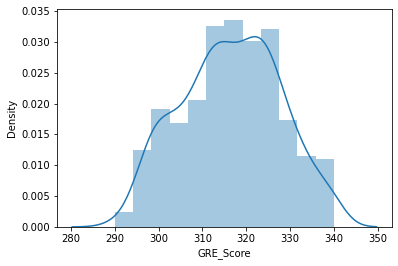

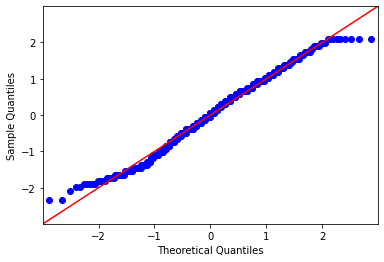

In [24]:
sns.distplot(data["GRE_Score"])
sm.qqplot(data["GRE_Score"],fit=True, line="45")
plt.show()

In [ ]:
# Chance of admit and GRE score are normally distrubted.

In [25]:
df["GRE_SCORE_CATEGORY"]=pd.qcut(df["GRE Score"],10)

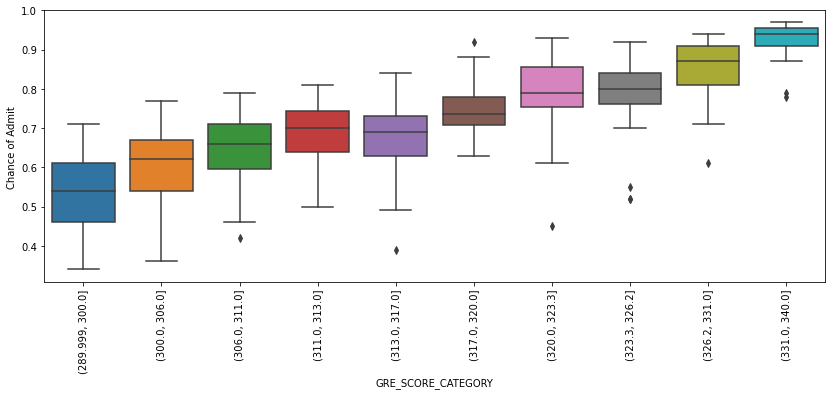

In [26]:
plt.figure(figsize=(14,5))
sns.boxplot(y = df["Chance of Admit "], x = df["GRE_SCORE_CATEGORY"])
plt.xticks(rotation = 90)
plt.show()

#### From above boxplot (distribution of chance of admition (probability of getting admition) as per GRE score  ) : with higher GRE score , there is high probability of getting an admition . 

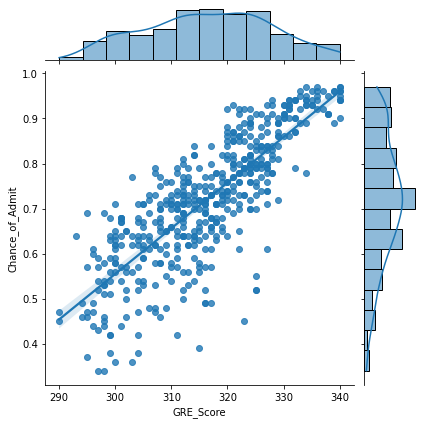

In [27]:
sns.jointplot(data["GRE_Score"],data["Chance_of_Admit"], kind = "reg" )

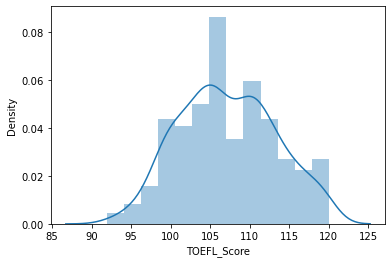

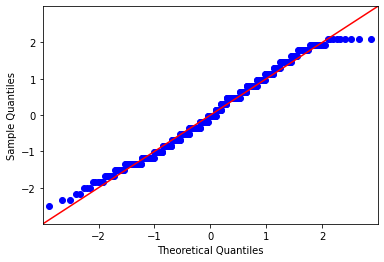

<AxesSubplot:xlabel='TOEFL_Score', ylabel='Chance_of_Admit'>

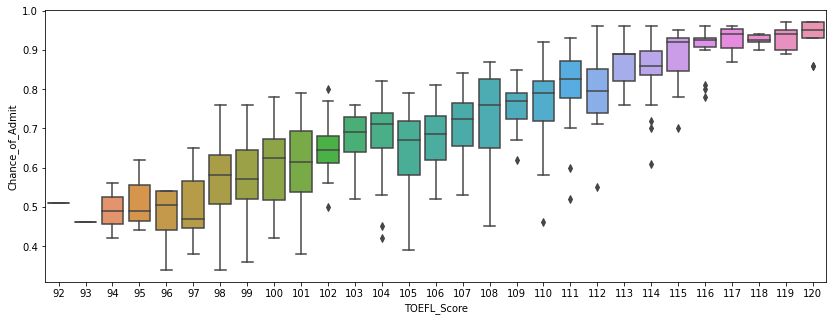

In [28]:
# TOEFL_Score                 

sns.distplot(data["TOEFL_Score"])
sm.qqplot(data["TOEFL_Score"],fit=True, line="45")
plt.show()
plt.figure(figsize=(14,5))
sns.boxplot(y = data["Chance_of_Admit"], x = data["TOEFL_Score"])

#### Students having high toefl score , has higher probability of getting admition . 

In [29]:
data[["GRE_Score","TOEFL_Score","Chance_of_Admit"]].corr()


,GRE_Score,TOEFL_Score,Chance_of_Admit
GRE_Score,1.000000,0.827200,0.810351
TOEFL_Score,0.827200,1.000000,0.792228
Chance_of_Admit,0.810351,0.792228,1.000000


####  GRE_Score and Toefl_Score have very high correlation with Chance_of_Admit

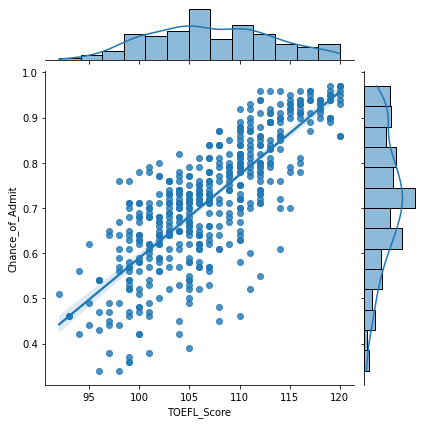

In [30]:
sns.jointplot(data["TOEFL_Score"],data["Chance_of_Admit"], kind = "reg" )

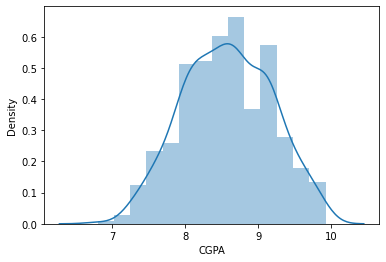

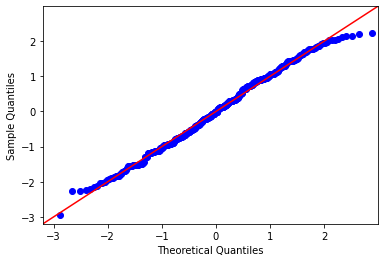

In [31]:
# CGPA                 
sns.distplot(data["CGPA"])
sm.qqplot(data["CGPA"],fit=True, line="45")
plt.show()


In [32]:
data[["CGPA","Chance_of_Admit"]].corr()


,CGPA,Chance_of_Admit
CGPA,1.000000,0.882413
Chance_of_Admit,0.882413,1.000000


#### CGPA also has a very high correlation with Chance of Admition 

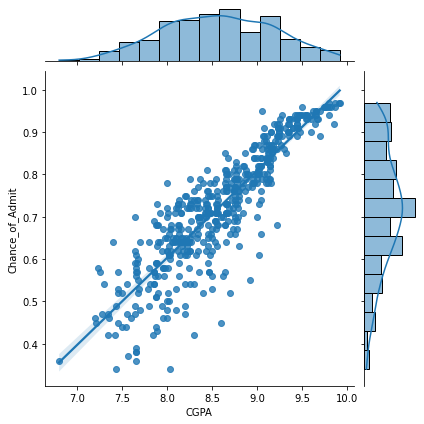

In [33]:
sns.jointplot(data["CGPA"],data["Chance_of_Admit"], kind = "reg" )

<AxesSubplot:xlabel='SOP', ylabel='Density'>

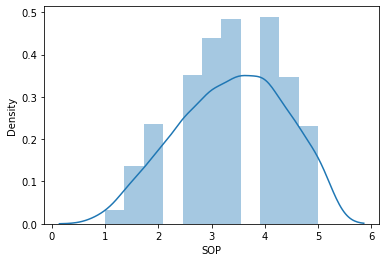

In [36]:
sns.distplot(data["SOP"])

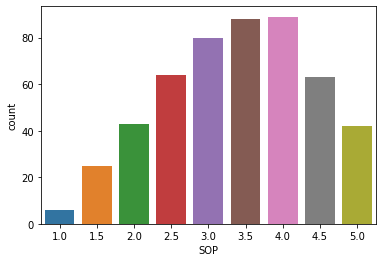

In [37]:
# SOP strength                 
sns.countplot(data["SOP"])
plt.show()


<AxesSubplot:xlabel='SOP', ylabel='Chance_of_Admit'>

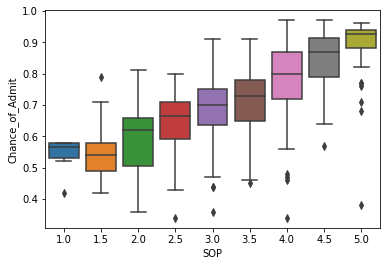

In [38]:
sns.boxplot(y = data["Chance_of_Admit"], x = data["SOP"])

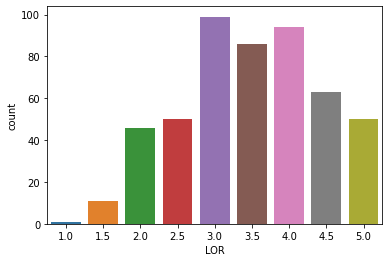

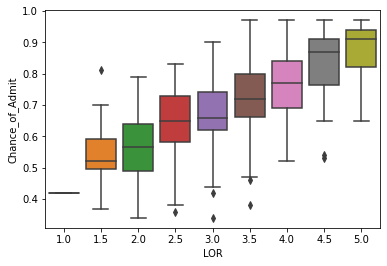

In [39]:
sns.countplot(data["LOR"])
plt.show()
sns.boxplot(y = data["Chance_of_Admit"], x = data["LOR"])
plt.show()


#### Statement of Purpose and Letter of Recommendation Strength increases then the chances of admition aslo increases 


In [40]:
data[["SOP","LOR","Chance_of_Admit"]].corr()


,SOP,LOR,Chance_of_Admit
SOP,1.000000,0.663707,0.684137
LOR,0.663707,1.000000,0.645365
Chance_of_Admit,0.684137,0.645365,1.000000


## Distribution of Cateogircal variables 

In [41]:
data.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [42]:
data.nunique()

GRE_Score             49
TOEFL_Score           29
University_Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance_of_Admit       61
dtype: int64

In [43]:
data["University_Rating"].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University_Rating, dtype: int64

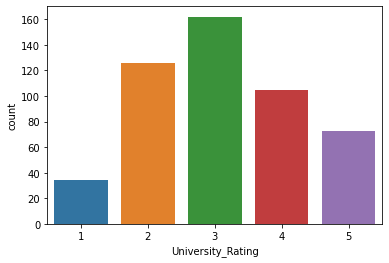

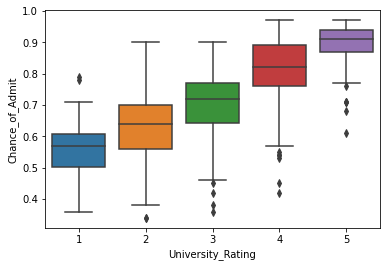

In [44]:
sns.countplot(data["University_Rating"])
plt.show()
sns.boxplot(y = data["Chance_of_Admit"], x = data["University_Rating"])
plt.show()


In [ ]:
# higher the university rating , increase the chance of getting admission . 

In [ ]:
#Research  

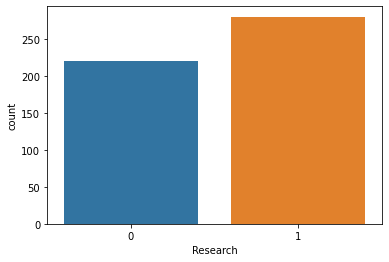

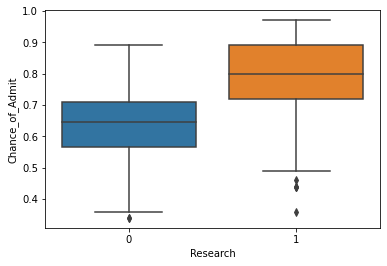

In [45]:
sns.countplot(data["Research"])
plt.show()
sns.boxplot(y = data["Chance_of_Admit"], x = data["Research"])
plt.show()


In [ ]:
## for research student has higher chance of getting the admission. 

### Assumption check for Linear Regression : 

GRE_Score


<Figure size 216x216 with 0 Axes>

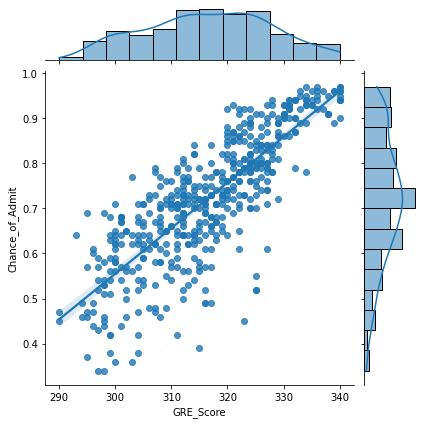

TOEFL_Score


<Figure size 216x216 with 0 Axes>

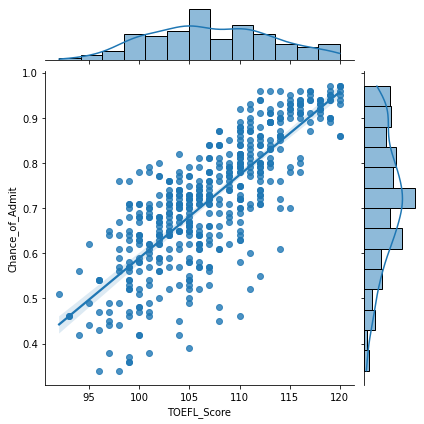

University_Rating


<Figure size 216x216 with 0 Axes>

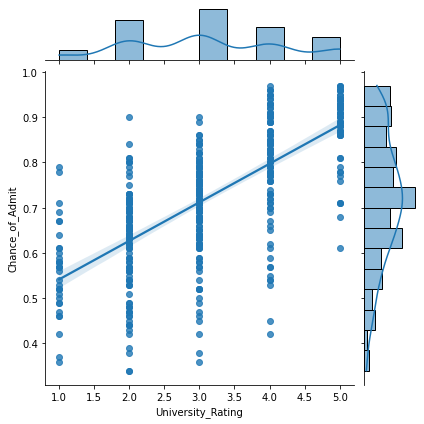

SOP


<Figure size 216x216 with 0 Axes>

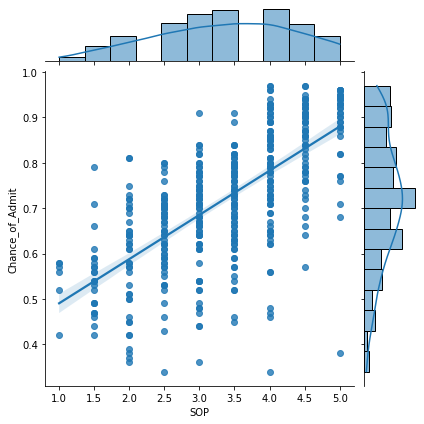

LOR


<Figure size 216x216 with 0 Axes>

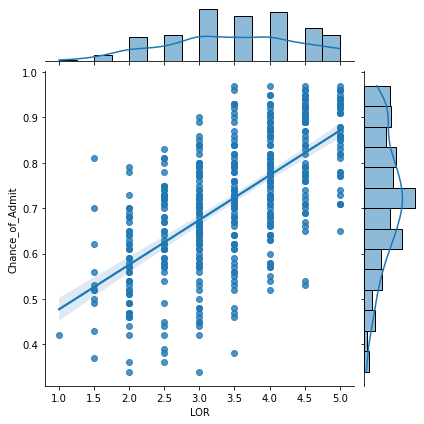

CGPA


<Figure size 216x216 with 0 Axes>

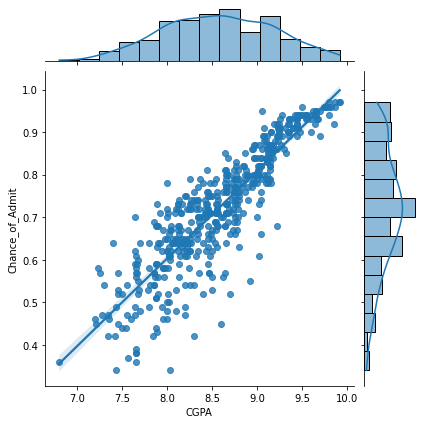

Research


<Figure size 216x216 with 0 Axes>

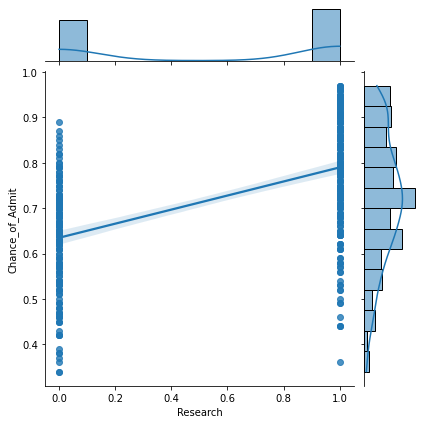

In [47]:
for col in data.columns[:-1]:
    print(col)
    plt.figure(figsize=(3,3))
    sns.jointplot(data[col],data["Chance_of_Admit"],kind="reg")
    plt.show()

       LOR, SOP , University rating and research are categorical variable, and amonst them chances of admits varies a lot.
       it would be good idea to drop LOA,SOP, and research columns especially.  

In [48]:
# further assumption checks are done while building and testing model .

## Regression using Sklearn library 
### Closed form solution technique for Linear Regression |  OLS:

In [49]:
X = data.drop(["Chance_of_Admit"],axis = 1)
y = data["Chance_of_Admit"]

In [50]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 


In [51]:
model = LinearRegression()

In [52]:
# train test spliting :

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [54]:
model.fit(X_train,y_train)

LinearRegression()

In [55]:
model.coef_

array([0.00213412, 0.00295079, 0.00484241, 0.00209556, 0.0186002 ,
       0.11336157, 0.02471331])

In [56]:
for idx, col in enumerate(X_train.columns):
    print("Coefficient for {} is {}".format(col,model.coef_[idx]))

Coefficient for GRE_Score is 0.002134116998958902
Coefficient for TOEFL_Score is 0.0029507946431573742
Coefficient for University_Rating is 0.004842411688671617
Coefficient for SOP is 0.002095555922376041
Coefficient for LOR is 0.018600202256919177
Coefficient for CGPA is 0.11336157243184922
Coefficient for Research is 0.024713311522787978


In [57]:
intercept = model.intercept_
intercept

-1.341760629850921

In [58]:
# r2_score
model.score(X_test,y_test)

0.7927524897595928

In [ ]:
# testing model on testing splited data.

In [59]:
y_pred = model.predict(X_test)


In [60]:
print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score

MSE: 0.004429285498957574
RMSE: 0.06655287746564813
MAE : 0.04730057428620611
r2_score: 0.7927524897595928


## Linear Regression using Statsmodel library

In [61]:
import statsmodels.api as sm

In [64]:
X_train_sm = X_train

In [65]:
X_train_sm = sm.add_constant(X_train_sm)

In [66]:
# added a constant in x_train , as stats model regression doent account for intercept separately 

### Multicolinearity check and further re-training model and testing : 

In [67]:
data.drop(["Chance_of_Admit"],axis = 1).corr()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
GRE_Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398
TOEFL_Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012
University_Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000


<AxesSubplot:>

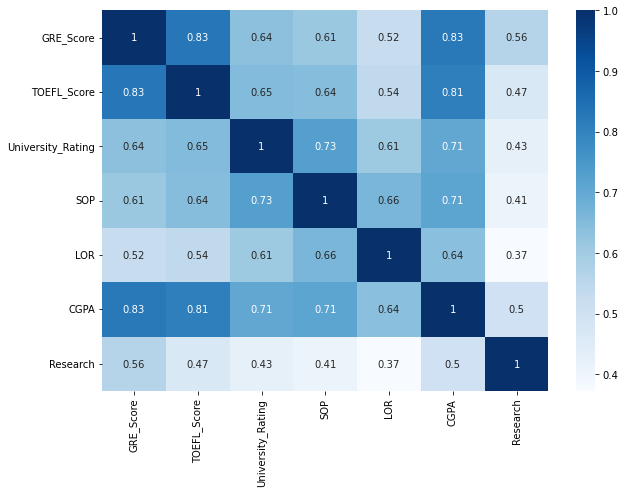

In [68]:
plt.figure(figsize=(10,7))
sns.heatmap(data.drop(["Chance_of_Admit"],axis = 1).corr(),annot = True,cmap = "Blues")

In [69]:
# GRE score and Toefel score have a very high correlation with CGPA
# GRE score and TOEFL score also have a very hight correlation 
# CGPA and University Rating , SOP stength and CGPA, have a high correlation .



In [70]:
# checking for Multicolinearity using vif score : 

### Variance Inflation Factor: 

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
vifs = []

for i in range(X_train_sm.shape[1]):
    
    vifs.append((variance_inflation_factor(exog = X_train_sm.values,
                                   exog_idx=i)))
pd.DataFrame({ "coef_name : " : X_train_sm.columns ,
             "vif : ": np.around(vifs,2)})

,coef_name :,vif :
0,const,1571.81
1,GRE_Score,4.24
2,TOEFL_Score,4.06
3,University_Rating,2.59
4,SOP,2.71
5,LOR,1.98
6,CGPA,4.77
7,Research,1.47


In [73]:
# model building

In [74]:
olsres = sm.OLS(y_train,X_train_sm).fit()

In [75]:
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     272.1
Date:                Sun, 02 Oct 2022   Prob (F-statistic):          3.33e-146
Time:                        19:28:36   Log-Likelihood:                 573.41
No. Observations:                 400   AIC:                            -1131.
Df Residuals:                     392   BIC:                            -1099.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3418      0.11

### Residual analysis : 

In [76]:
ypred = olsres.predict(X_train_sm)


In [77]:
print("Mean of residuals : ",np.mean(y_train - ypred))



Mean of residuals :  1.1572687252936476e-15


In [78]:
# distribution plot of all residuals 

In [79]:
Residuals = (y_train-ypred)

<AxesSubplot:ylabel='Density'>

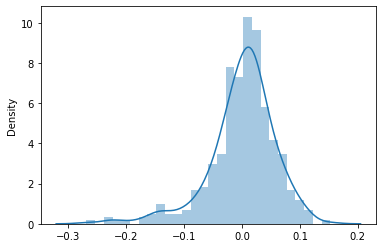

In [80]:
sns.distplot(Residuals)

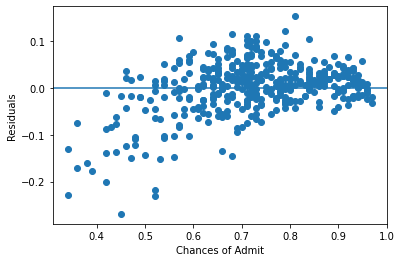

In [81]:
plt.scatter(y_train,Residuals)
plt.xlabel("Chances of Admit")
plt.ylabel("Residuals")
plt.axhline(y= 0)
plt.show()

In [82]:
# Homoscedasticity
# from above residual plot , we can observe the varinace is not so constant . 
# all residuals are not evenly distributed.
# linear model may not be an appropriate model for this data
# we can try different non linear model on given data

<AxesSubplot:>

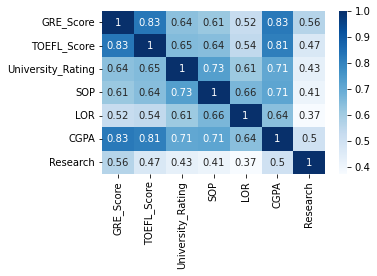

In [83]:
plt.figure(figsize=(5,3))
sns.heatmap(data.drop(["Chance_of_Admit"],axis = 1).corr(),annot = True,cmap = "Blues")

    # based on above heatmap ,
    highly correlated independent features are 
    GRE and Toefl score
    CGPA and GRE score
    CGPA and TOEFL score
    SOP and University_rating

    we can get rid of CGPA and SOP  , which can help model become better and reduce multicolinearity: 
    


In [84]:
X = data.drop(["Chance_of_Admit"],axis = 1)
y = data["Chance_of_Admit"]

In [85]:
X = X.drop(["CGPA","SOP","Research"],axis = 1)


<AxesSubplot:>

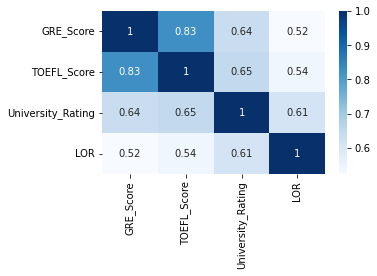

In [86]:
plt.figure(figsize=(5,3))
sns.heatmap(X.corr(),annot = True,cmap = "Blues")

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [88]:
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)

In [89]:
vifs = []

for i in range(X_train_sm.shape[1]):
    
    vifs.append((variance_inflation_factor(exog = X_train_sm.values,
                                   exog_idx=i)))

In [90]:
pd.DataFrame({ "coef_name : " : X_train_sm.columns ,
             "vif : ": np.around(vifs,2)})

,coef_name :,vif :
0,const,1280.58
1,GRE_Score,3.30
2,TOEFL_Score,3.50
3,University_Rating,2.13
4,LOR,1.67


    compare to previous model , VIF score has improved 

In [91]:

olsres = sm.OLS(y_train,X_train_sm).fit()

print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     331.4
Date:                Sun, 02 Oct 2022   Prob (F-statistic):          9.08e-125
Time:                        19:29:31   Log-Likelihood:                 514.15
No. Observations:                 400   AIC:                            -1018.
Df Residuals:                     395   BIC:                            -998.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.7060      0.12

In [92]:
# re-training model with sklearn library after dropping multicorrelated columns

In [93]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [94]:

for idx, col in enumerate(X_train.columns):
    print("Coefficient for {} is {}".format(col,model.coef_[idx]))


Coefficient for GRE_Score is 0.004969454056389344
Coefficient for TOEFL_Score is 0.006438948113717941
Coefficient for University_Rating is 0.01631414794238277
Coefficient for LOR is 0.03308318361391109


In [95]:
intercept = model.intercept_
intercept


-1.706029244076706

In [96]:
model.score(X_test,y_test)


0.7181750805517935

In [97]:
mean_squared_error(y_test,y_pred) # MSE

0.004429285498957574

In [98]:
y_pred = model.predict(X_test)


In [99]:
r2_score(y_test,y_pred) # r2score

0.7181750805517935

<AxesSubplot:ylabel='Density'>

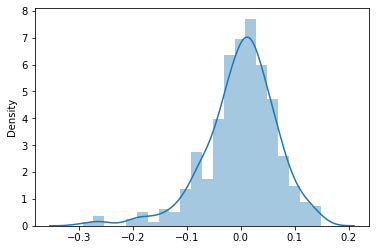

In [100]:
sns.distplot((y_train.values-model.predict(X_train)))

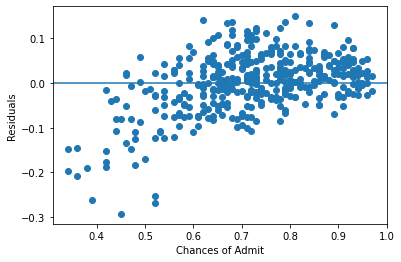

In [101]:
Residuals = (y_train-model.predict(X_train))
plt.scatter(y_train,Residuals)
plt.xlabel("Chances of Admit")
plt.ylabel("Residuals")
plt.axhline(y= 0)
plt.show()

### University rating, research are categorical data
#### one hot encoding on categorical data

In [102]:
X = data.drop(["Chance_of_Admit"],axis = 1)
y = data["Chance_of_Admit"]


In [103]:
X["University_Rating"] = X["University_Rating"].astype("str")
X["SOP"] = X["SOP"].astype("str")
X["Research"] = X["Research"].astype("str")
X["LOR"] = X["LOR"].astype("str")

In [104]:
X.drop(["SOP","LOR","CGPA"],axis=1,inplace=True)

In [105]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GRE_Score          500 non-null    int64 
 1   TOEFL_Score        500 non-null    int64 
 2   University_Rating  500 non-null    object
 3   Research           500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [106]:
X = pd.get_dummies(X,columns=["University_Rating","Research"], drop_first=True)

In [107]:
X.sample(3)

,GRE_Score,TOEFL_Score,University_Rating_2,University_Rating_3,University_Rating_4,University_Rating_5,Research_1
31,327,103,0,1,0,0,1
36,299,106,1,0,0,0,0
487,327,115,0,0,1,0,0


In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [109]:
model = LinearRegression()
model.fit(X_train,y_train)
for idx, col in enumerate(X_train.columns):
    print("Coefficient for {} is {}".format(col,model.coef_[idx]))

Coefficient for GRE_Score is 0.0042971911530636205
Coefficient for TOEFL_Score is 0.007817390571837862
Coefficient for University_Rating_2 is 0.022092674033247592
Coefficient for University_Rating_3 is 0.03965050336482262
Coefficient for University_Rating_4 is 0.061582709875644036
Coefficient for University_Rating_5 is 0.1045807390467217
Coefficient for Research_1 is 0.034396108868679755


In [110]:
intercept = model.intercept_
intercept

-1.5408661096223817

In [111]:
print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE:",mean_absolute_error(y_test,y_pred))  # MAE
print("r2_score : ",r2_score(y_test,y_pred)) # r2score


MSE: 0.00602315090545029
RMSE: 0.07760896150220212
MAE: 0.05841352973392741
r2_score :  0.7181750805517935


In [112]:
y_predicted = model.predict(X_test)
r_2 = r2_score(y_test,y_predicted)

In [113]:
r_2

0.6975802446909818

In [114]:
model.score(X_test,y_test)

0.6975802446909818

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     172.2
Date:                Sun, 02 Oct 2022   Prob (F-statistic):          2.18e-115
Time:                        19:29:56   Log-Likelihood:                 500.77
No. Observations:                 400   AIC:                            -985.5
Df Residuals:                     392   BIC:                            -953.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.5409    

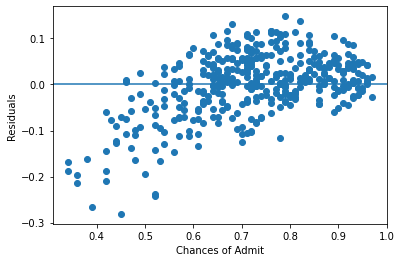

In [115]:
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
olsres = sm.OLS(y_train,X_train_sm).fit()

print(olsres.summary())
ypred = olsres.predict(X_train_sm)
Residuals = (y_train-ypred)
plt.scatter(y_train,Residuals)
plt.xlabel("Chances of Admit")
plt.ylabel("Residuals")
plt.axhline(y= 0)
plt.show()

In [116]:
vifs = []

for i in range(X_train_sm.shape[1]):
    
    vifs.append((variance_inflation_factor(exog = X_train_sm.values,
                                   exog_idx=i)))


pd.DataFrame({ "coef_name : " : X_train_sm.columns ,
             "vif : ": np.around(vifs,2)})



,coef_name :,vif :
0,const,1594.59
1,GRE_Score,3.71
2,TOEFL_Score,3.46
3,University_Rating_2,4.01
4,University_Rating_3,4.65
5,University_Rating_4,4.32
6,University_Rating_5,4.13
7,Research_1,1.46
